# Visualizations

## Imports

In [1]:
import pandas as pd
import datetime

#Visualizations
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

## Import Files

In [14]:
#Crowd_Df
crowd_df = pd.read_csv("../../../Data_thesis/Full_Datasets/Crowdedness.csv")
crowd_df = crowd_df.drop_duplicates(subset="Sensor").reset_index().drop(columns={"index"})

#GVB
gvb_df = pd.read_csv("../../../Data_thesis/Full_Datasets/GVBData.csv")

gvb_cor_dict = {}

gvb_dict = gvb_df.to_dict("index")

gvb_cor_dict["Nieuwmarkt"] = {"Latitude": gvb_dict[0]["Nieuwmarkt Lat"], "Longitude": gvb_dict[0]["Nieuwmarkt Lon"]}
gvb_cor_dict["Nieuwezijdse Kolk"] = {"Latitude": gvb_dict[0]["Nieuwezijds Kolk Lat"], 
                                         "Longitude": gvb_dict[0]["Nieuwezijds Kolk Lon"]}
gvb_cor_dict["Dam"] = {"Latitude": gvb_dict[0]["Dam Lat"], "Longitude": gvb_dict[0]["Dam Lon"]}
gvb_cor_dict["Spui"] = {"Latitude": gvb_dict[0]["Spui Lat"], "Longitude": gvb_dict[0]["Spui Lon"]}

gvb_cor_df = pd.DataFrame.from_dict(gvb_cor_dict, orient="index").reset_index()
gvb_cor_df = gvb_cor_df.rename(index=str, columns={"index": "Station"})

#Events DF
events_df = pd.read_csv("../../../Data_thesis/Full_Datasets/Events.csv")

In [17]:
events_df.head()

,Date,is_event,event_lat,event_lon
0,2018-04-20,1.0,52.372638,4.894106
1,2018-05-20,1.0,52.372638,4.894106
2,2018-06-02,1.0,52.361582,4.885479
3,2018-06-03,1.0,52.361582,4.885479
4,2018-06-04,1.0,52.361582,4.885479


In [15]:
#Roadmap
road_map = gpd.read_file("../../../Data_thesis/MapShapeFiles/roads.shp")

## Map

### Variables

In [37]:
#Coordinate system
crs = {"init": "epsg:4326"}

#Geometry points
crowd_geometry = [Point(xy) for xy in zip(crowd_df["SensorLongitude"], crowd_df["SensorLatitude"])]
gvb_geometry = [Point(xy) for xy in zip(gvb_cor_df["Longitude"], gvb_cor_df["Latitude"])]
event_geometry = [Point(xy) for xy in zip(events_df["event_lon"], events_df["event_lat"])]

#Markersize
marker_size = 40

### GeoDF Construction

#### Crowdedness

In [20]:
crowd_geo_df = gpd.GeoDataFrame(crowd_df,
                         crs = crs,
                         geometry = crowd_geometry)

crowd_geo_df = crowd_geo_df[["Sensor", "geometry"]]

crowd_geo_df.head()

,Sensor,geometry
0,GAWW-01,POINT (4.8998471 52.3746006)
1,GAWW-02,POINT (4.8989027 52.3737857)
2,GAWW-03,POINT (4.8973336 52.3725237)
3,GAWW-04,POINT (4.897907599999999 52.373283)
4,GAWW-05,POINT (4.8977166 52.3723534)


#### GVB

In [22]:
gvb_geo_df = gpd.GeoDataFrame(gvb_cor_df,
                         crs = crs,
                         geometry = gvb_geometry)

gvb_geo_df = gvb_geo_df[["Station", "geometry"]]

gvb_geo_df.head()

,Station,geometry
0,Dam,POINT (4.89008027 52.37312668)
1,Nieuwezijdse Kolk,POINT (4.89373093 52.37628765)
2,Nieuwmarkt,POINT (4.90123885 52.37194169)
3,Spui,POINT (4.88925912 52.36909673)


#### Events

In [24]:
events_geo_df = gpd.GeoDataFrame(events_df,
                         crs = crs,
                         geometry = event_geometry)

events_geo_df = events_geo_df[["is_event", "geometry"]]

events_geo_df.head()

,is_event,geometry
0,1.0,POINT (4.894106 52.372638)
1,1.0,POINT (4.894106 52.372638)
2,1.0,POINT (4.885479 52.361582)
3,1.0,POINT (4.885479 52.361582)
4,1.0,POINT (4.885479 52.361582)


### Map

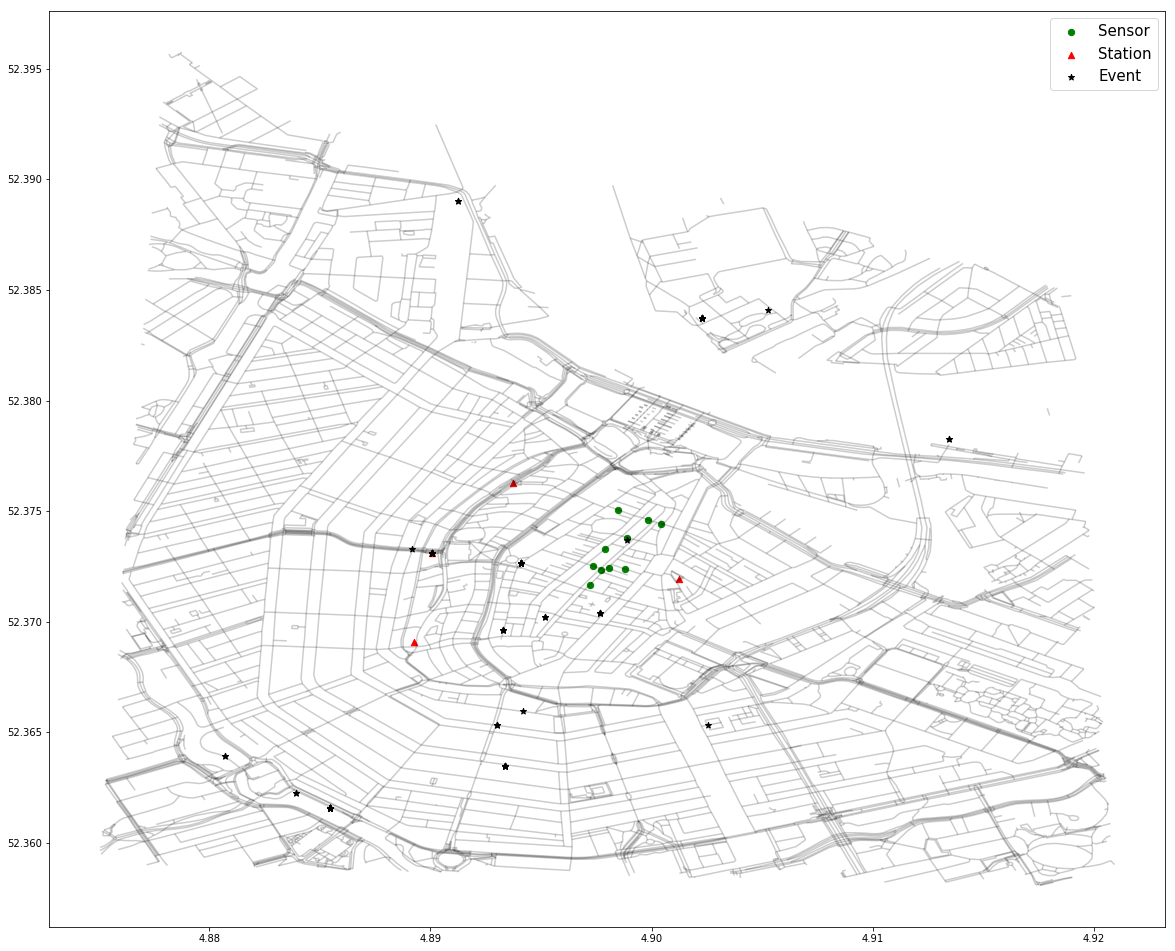

In [48]:
fig,ax = plt.subplots(figsize = (20, 20))
road_map.plot(ax = ax, alpha = 0.2, color = "black")

#Crowdedness
crowd_geo_df.plot(ax = ax, markersize = marker_size, color = "green", marker = "o", 
                                                       label = "Sensor")

#GVB
gvb_geo_df.plot(ax = ax, markersize = marker_size, color = "red", marker = "^", 
                                                        label = "Station")

#Events
events_geo_df.plot(ax = ax, markersize = marker_size, color = "black", marker = "*", 
                                                       label = "Event")

plt.legend(prop={"size": 15})